# Pre-PCA 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import the PCA package from scikit-learn
from sklearn.decomposition import PCA
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
## data acquisition 
## Spaced repetition DATA from Duolingo Research 
dataframe = pd.read_csv("/Users/zeinebouerghi/Downloads/duolingodata.csv.gz")
dataframe.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [3]:
#Data Cleaning and Manipulation 
#adding variables 
#adding number of mistakes made 
dataframe['mistakes'] = dataframe.history_seen - dataframe.history_correct
dataframe['session_mistakes'] = dataframe.session_seen - dataframe.session_correct
dataframe['rate_of_error_per_session'] = dataframe.session_mistakes/dataframe.session_seen
dataframe['general_rate_of_error'] = dataframe.mistakes/dataframe.history_seen 
# unit='s' to convert it into epoch time
dataframe['Datetime'] = pd.to_datetime(dataframe['timestamp'], 
                                  unit='s')

In [11]:
data1= dataframe.drop(['user_id', 'learning_language', 'ui_language','lexeme_id', 'lexeme_string', 'Datetime'], axis =1 )

In [12]:
data1.cov()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error
p_recall,0.073661,-5.642021e+01,-1.842634e+04,-7.998090e-01,-3.903015e-01,0.015296,0.108020,-4.095076e-01,-0.092724,-0.073661,-0.003921
timestamp,-56.420206,8.597104e+10,1.596526e+10,-8.312313e+04,-1.082306e+05,4115.197805,3744.118677,2.510747e+04,371.079128,56.420206,24.209426
delta,-18426.337785,1.596526e+10,5.046758e+12,-8.842201e+06,-7.600733e+06,6631.974851,-20540.070110,-1.241468e+06,27172.044961,18426.337785,-6021.417447
history_seen,-0.799809,-8.312313e+04,-8.842201e+06,1.678342e+04,1.429734e+04,0.510853,-0.754638,2.486077e+03,1.265491,0.799809,0.445737
history_correct,-0.390301,-1.082306e+05,-7.600733e+06,1.429734e+04,1.253685e+04,0.552501,-0.060048,1.760489e+03,0.612549,0.390301,0.079247
session_seen,0.015296,4.115198e+03,6.631975e+03,5.108532e-01,5.525007e-01,1.850089,1.709149,-4.164748e-02,0.140940,-0.015296,0.010402
session_correct,0.108020,3.744119e+03,-2.054007e+04,-7.546377e-01,-6.004840e-02,1.709149,1.739217,-6.945893e-01,-0.030069,-0.108020,0.003395
mistakes,-0.409508,2.510747e+04,-1.241468e+06,2.486077e+03,1.760489e+03,-0.041647,-0.694589,7.255875e+02,0.652942,0.409508,0.366490
session_mistakes,-0.092724,3.710791e+02,2.717204e+04,1.265491e+00,6.125491e-01,0.140940,-0.030069,6.529418e-01,0.171009,0.092724,0.007007
rate_of_error_per_session,-0.073661,5.642021e+01,1.842634e+04,7.998090e-01,3.903015e-01,-0.015296,-0.108020,4.095076e-01,0.092724,0.073661,0.003921


# Standardizing the Dataset 
Standardizing every value in the dataset to ensure that the features are normally distributed to enable comparaison to other features. 

In [13]:
pca = PCA(data1, standardize=True, method='eig')
normalized_dataset = pca.transformed_data

# Finding Covariance 
We need to investigate teh covariance calculation in order to find relationships between the dimensionsions 

In [20]:
# Covariance Matrix
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), 
columns=data1.columns)


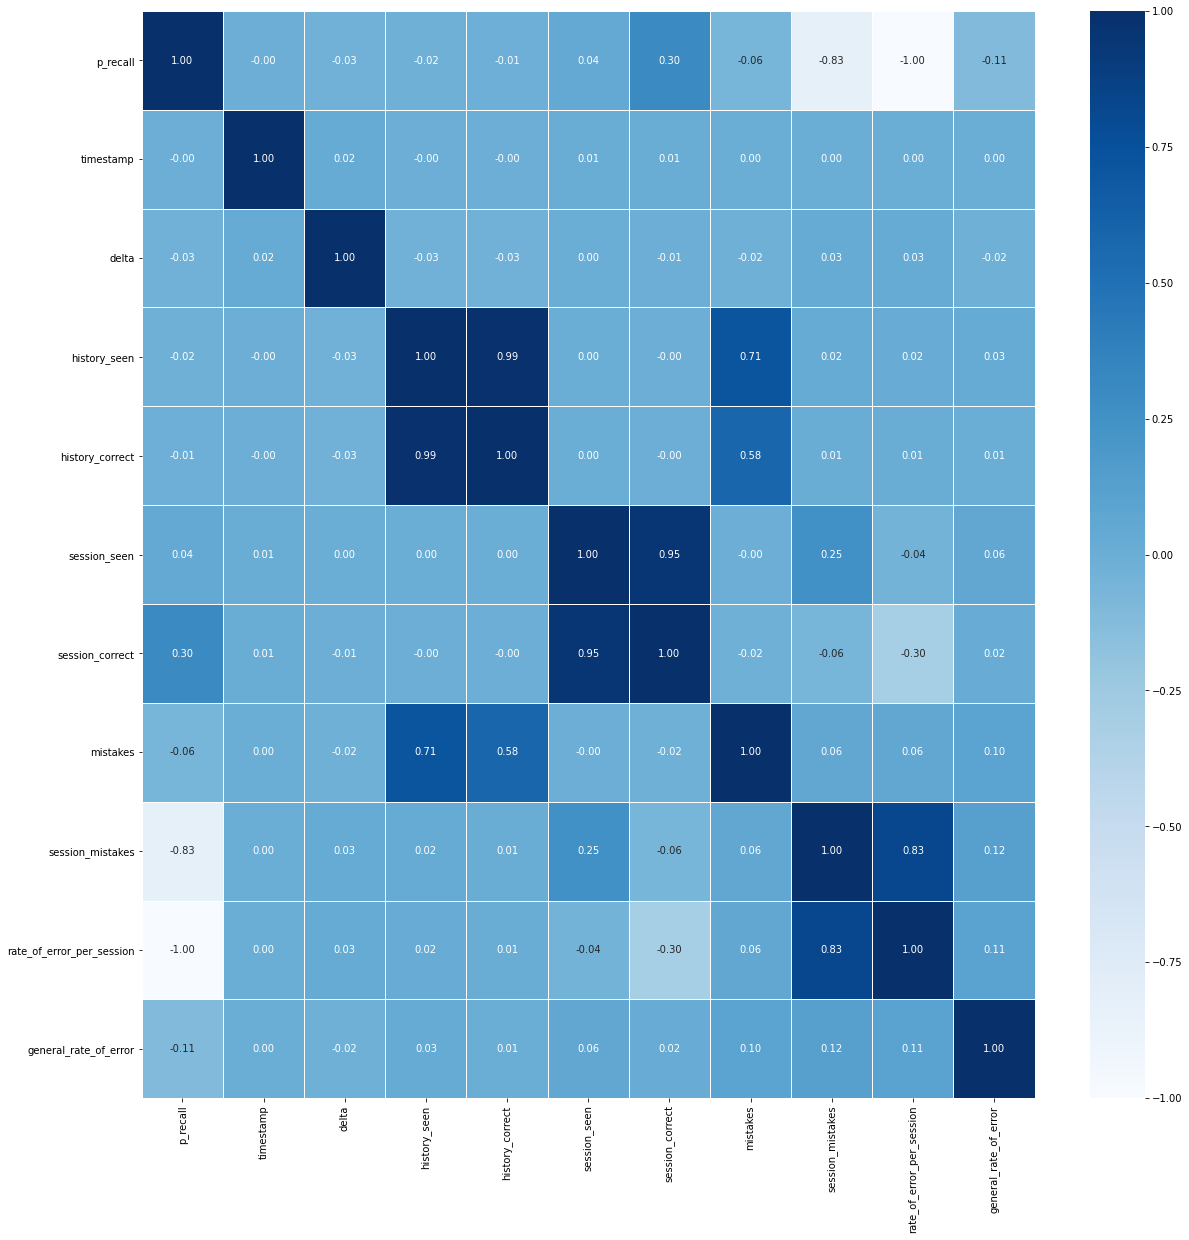

In [21]:
# Plot Covariance Matrix
plt.subplots(figsize=(20, 20))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', 
yticklabels=data1.columns)
plt.show()

In [ ]:
principal_df.head()

# Looking a the correlation between the features and principal components

In [23]:
components_df = pca.factors
combined_df = pd.concat([data1, components_df], axis=1)
correlation = combined_df.corr()

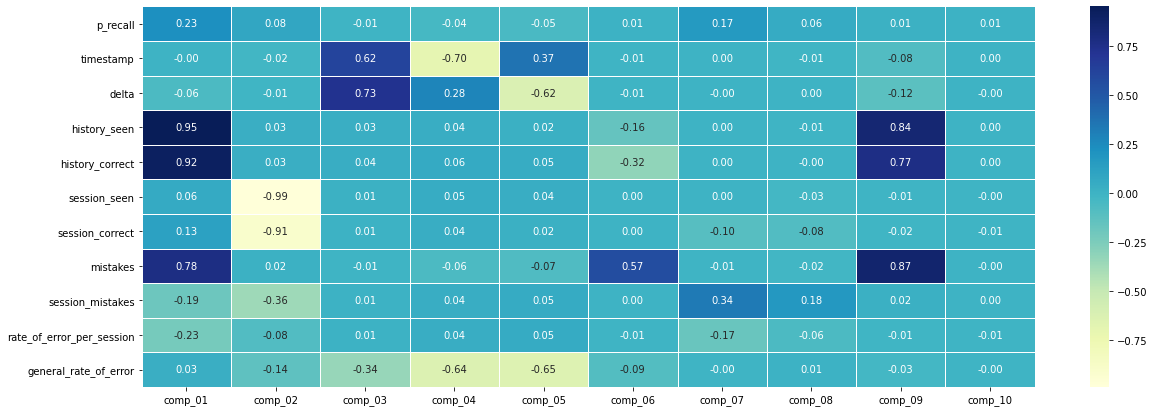

In [25]:
# This matrix will have the correlation between:
# We're removing part of the output to keep only the correlation between features and principal components
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_01':]

# plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In the above correlation matrix, Component  comp_1 has the highest correlation values. 
- comp_1, history_seen, history_correct, and mistakes have the highest correlation in the above heat map 
- comp_8 , history_seen, history_correct, and mistakes have the second highest correlation 

# Sorting the eigenvalues (PCs) in a descending order based on their strength

In [26]:
pca = PCA(data1, standardize=True, method='eig')
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])
print(eigen_values)

      eigenvalue
0   3.734725e+07
1   3.233109e+07
2   2.527078e+07
3   1.321745e+07
4   1.272513e+07
5   1.232542e+07
6   5.840353e+06
7   2.339015e+06
8   1.954715e-07
9   1.440656e-07
10  8.543774e-09


# Choosing the k eigenvectors 

In [27]:
pca = PCA(data1, standardize=True, method='eig')

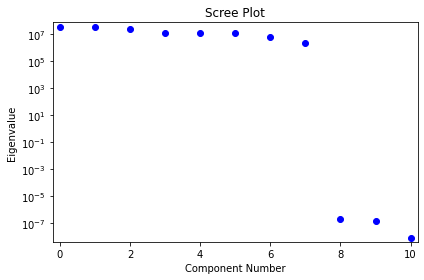

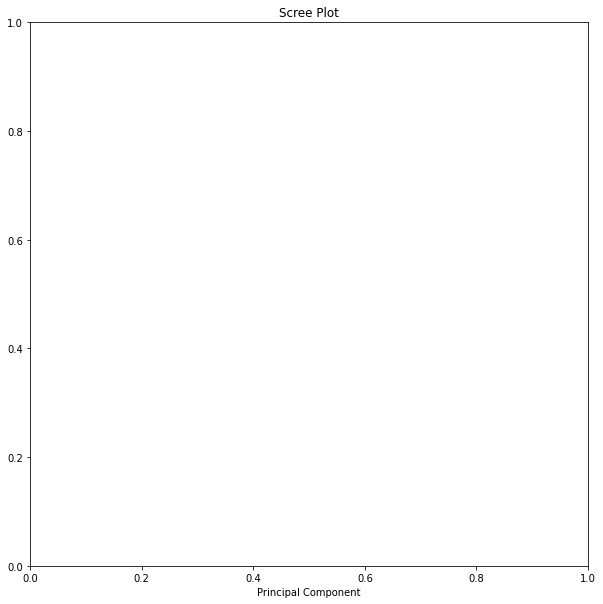

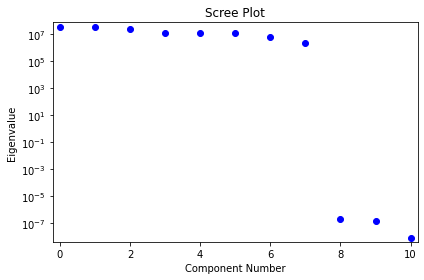

In [28]:
plt.subplots(figsize=(10, 10))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
pca.plot_scree()

Scree plot displays how much variation each principal component captures from the data.

In [32]:
#defining the columns to use for PCA 
U= dataframe.drop(['user_id', 'learning_language', 'ui_language','lexeme_id', 'lexeme_string', 'Datetime','p_recall'], axis =1 )
X = U.values 
Y = dataframe.loc[:,'p_recall'].values
N = 8 


In [ ]:
#import the PCA sklearn.decomposition
pca = PCA(N)
principal_comps = pca.fit_transform(X)

In [ ]:
# Convert into a new dataframe
principal_df = pd.DataFrame(data = principal_comps, columns = ['pc1', 'pc2'])
principal_df['target'] = Y
# Change plot style
plt.style.use('seaborn-darkgrid')

# Plot the dataset with the principal components
fig=plt.scatter(
    x=principal_df['pc1'], 
    y=principal_df['pc2'], 
    c=principal_df['target']
)